## Abstract
The song popularity dataset has multiple variable from which we can predict the song popularity. The main aim is to find which all variables are making most sense. And to evaluate the accuracy of the model using H2O Auto ML.Another aim is to find which all features has high multi-collienarity. To indentify how the song popularity is scored.The dataset seems cleaned already and has no null values in it. 

In [114]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip uninstall h2o
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Found existing installation: h2o 3.36.0.2
Uninstalling h2o-3.36.0.2:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/h2o-3.36.0.2.dist-info/*
    /usr/local/lib/python3.7/dist-packages/h2o/*
Proceed (y/n)? y
  Successfully uninstalled h2o-3.36.0.2
Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
  Using cached h2o-3.36.0.2-py2.py3-none-any.whl


In [115]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt

In [116]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [117]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

2


In [118]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)      
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:47744 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.13" 2021-10-19; OpenJDK Runtime Environment (build 11.0.13+8-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.13+8-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmprx93b6rt
  JVM stdout: /tmp/tmprx93b6rt/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmprx93b6rt/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:47744
Connecting to H2O server at http://127.0.0.1:47744 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_fxbkv9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [119]:
url = "/content/drive/MyDrive/song_data.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [120]:
row=[15586]
df.drop(row,axis=0)


song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,2.94e-05,8,0.0589,-4.095,1,0.0294,167.06,4,0.474
In The End,66,216933,0.0103,0.542,0.853,0,3,0.108,-6.407,0,0.0498,105.256,4,0.37
Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447,0,0.255,-7.828,1,0.0792,123.881,4,0.324
By The Way,74,216933,0.0264,0.451,0.97,0.00355,0,0.102,-4.938,1,0.107,122.444,4,0.198
How You Remind Me,56,223826,0.000954,0.447,0.766,0,10,0.113,-5.065,1,0.0313,172.011,4,0.574
Bring Me To Life,80,235893,0.00895,0.316,0.945,1.85e-06,4,0.396,-3.169,0,0.124,189.931,4,0.32
Last Resort,81,199893,0.000504,0.581,0.887,0.00111,4,0.268,-3.659,0,0.0624,90.578,4,0.724
Are You Gonna Be My Girl,76,213800,0.00148,0.613,0.953,0.000582,2,0.152,-3.435,1,0.0855,105.046,4,0.537
Mr. Brightside,80,222586,0.00108,0.33,0.936,0,1,0.0926,-3.66,1,0.0917,148.112,4,0.234
Sex on Fire,81,203346,0.00172,0.542,0.905,0.0104,9,0.136,-5.653,1,0.054,153.398,4,0.374


In [121]:
df['churn_bit'] = df['song_popularity'].asnumeric()
df.types
df.head()
df.describe()


Rows:18833
Cols:16




,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,churn_bit
type,enum,int,int,real,real,real,real,int,real,real,int,real,real,int,real,int
mins,,0.0,12000.0,1.02e-06,0.0,0.00107,0.0,0.0,0.0109,-38.768,0.0,0.0,0.0,0.0,0.0,0.0
mean,,52.99553974406624,218213.93394573362,0.25853325622895984,0.6333354165560454,0.6449665077258002,0.07800134884033351,5.289598045983115,0.17966188605108055,-7.447779164232999,0.62809961238252,0.1020927096054798,121.07396187543145,3.959114320607444,0.5279598099081398,52.99553974406624
maxs,,100.0,1799346.0,0.996,0.987,0.999,0.997,11.0,0.986,1.585,1.0,0.941,242.318,5.0,0.984,100.0
sigma,,21.903758102607654,59890.15209519732,0.2887172340963566,0.15672517264874103,0.214094569947863,0.22159666092674765,3.614542545488745,0.14398739991400542,3.827876542453302,0.4833248319923484,0.10437963825464319,28.71548387623507,0.29854842346733057,0.2446431184005412,21.903758102607654
zeros,,272,0,0,2,0,7150,2181,0,0,7004,2,2,3,2,272
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520000000000001,0.496,0.682,2.94e-05,8.0,0.0589,-4.095,1.0,0.0294,167.06,4.0,0.474,73.0
1,In The End,66.0,216933.0,0.0103,0.542,0.853,0.0,3.0,0.108,-6.407,0.0,0.0498,105.256,4.0,0.37,66.0
2,Seven Nation Army,76.0,231733.0,0.00817,0.737,0.463,0.447,0.0,0.255,-7.827999999999999,1.0,0.0792,123.881,4.0,0.324,76.0


In [122]:
df.shape

(18833, 16)

In [123]:
pct_rows=0.80
df_train, df_test = df.split_frame([pct_rows])

In [124]:
print(df_train.shape)
print(df_test.shape)


(15126, 16)
(3707, 16)


In [125]:
df_train.head()

song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,churn_bit
Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,2.94e-05,8,0.0589,-4.095,1,0.0294,167.06,4,0.474,73
In The End,66,216933,0.0103,0.542,0.853,0,3,0.108,-6.407,0,0.0498,105.256,4,0.37,66
Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447,0,0.255,-7.828,1,0.0792,123.881,4,0.324,76
By The Way,74,216933,0.0264,0.451,0.97,0.00355,0,0.102,-4.938,1,0.107,122.444,4,0.198,74
How You Remind Me,56,223826,0.000954,0.447,0.766,0,10,0.113,-5.065,1,0.0313,172.011,4,0.574,56
Bring Me To Life,80,235893,0.00895,0.316,0.945,1.85e-06,4,0.396,-3.169,0,0.124,189.931,4,0.32,80
Last Resort,81,199893,0.000504,0.581,0.887,0.00111,4,0.268,-3.659,0,0.0624,90.578,4,0.724,81
Are You Gonna Be My Girl,76,213800,0.00148,0.613,0.953,0.000582,2,0.152,-3.435,1,0.0855,105.046,4,0.537,76
Mr. Brightside,80,222586,0.00108,0.33,0.936,0,1,0.0926,-3.66,1,0.0917,148.112,4,0.234,80
Sex on Fire,81,203346,0.00172,0.542,0.905,0.0104,9,0.136,-5.653,1,0.054,153.398,4,0.374,81


In [126]:
# Set the features and target
X=df.columns
print(X)

['song_name', 'song_popularity', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence', 'churn_bit']


In [127]:
# Set target and predictor variables
y ='song_popularity'
y_numeric ='churn_bit'
X.remove(y)
X.remove(y_numeric) 
print(X)

['song_name', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


In [128]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [129]:
aml.train(x=X,y=y,training_frame=df_train)      

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220214_42243

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 115.04506089218276
RMSE: 10.72590606392685
MAE: 8.217656590896516
RMSLE: 0.5599054588429417
R^2: 0.7625907030125595
Mean Residual Deviance: 115.04506089218276
Null degrees of freedom: 10056
Residual degrees of freedom: 10051
Null deviance: 4873706.665580884
Residual deviance: 1157008.177392682
AIC: 76278.25197296492

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 334.6055865066431
RMSE: 18.29222748892663
MAE: 13.990561084758525
RMSLE: NaN
R^2: 0.30950480540801584
Mean Residual Deviance: 334.6055865066431
Null degrees of freedom: 15125
Residual degrees of freedom: 15120
Null deviance: 7331143.925318904
Residual devia

In [130]:
print(aml.leaderboard)

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_1_AutoML_1_20220214_42243,334.606,18.2922,334.606,13.9906,nan
StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_42243,335.483,18.3162,335.483,14.0085,nan
DRF_1_AutoML_1_20220214_42243,351.595,18.7509,351.595,13.8914,0.740444
GBM_4_AutoML_1_20220214_42243,359.964,18.9727,359.964,14.8228,0.75716
StackedEnsemble_BestOfFamily_1_AutoML_1_20220214_42243,363.499,19.0657,363.499,14.8549,0.755766
GBM_1_AutoML_1_20220214_42243,366.488,19.1439,366.488,14.8261,0.760485
GBM_3_AutoML_1_20220214_42243,367.829,19.1789,367.829,15.0304,0.760572
GBM_2_AutoML_1_20220214_42243,378.801,19.4628,378.801,15.3127,0.764729
GBM_5_AutoML_1_20220214_42243,433.605,20.8232,433.605,16.597,0.784398
GLM_1_AutoML_1_20220214_42243,461.002,21.471,461.002,17.1226,0.793543


In [131]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1     
models_dict

{'DRF_1_AutoML_1_20220214_42243': 2,
 'GLM_1_AutoML_1_20220214_42243': 9,
 'StackedEnsemble_AllModels_1_AutoML_1_20220214_42243': 0,
 'StackedEnsemble_BestOfFamily_2_AutoML_1_20220214_42243': 1}

In [132]:
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])

2


In [133]:
best_model.algo

'drf'

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

In [135]:
print(best_model.rmse(train = True))

20.573513835450434


In [136]:
print(best_model.rmse(train = False))

20.573513835450434


In [137]:
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [138]:
mod_perf=best_model.model_performance(df_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 314.0276676697879,
 'null_degrees_of_freedom': None,
 'null_deviance': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'rmse': 17.720825817940536}

In [139]:
predictions = best_model.predict(df_test)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [140]:
best_model.model_performance(train=True)


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 423.26947153747045
RMSE: 20.573513835450434
MAE: 14.88823068696378
RMSLE: 0.7910203069551026
Mean Residual Deviance: 423.26947153747045


In [141]:
y_pred=h2o.as_list(predictions)
y_pred[0:100]

,predict
0,42.065804
1,67.638636
2,49.010417
3,36.066667
4,55.980487
...,...
95,64.079115
96,29.312500
97,63.400000
98,61.541667


In [142]:
y_test=h2o.as_list(df_test[y_numeric])
y_test[0:100]

,churn_bit
0,77
1,79
2,73
3,57
4,71
...,...
95,71
96,69
97,76
98,68


In [143]:
print(X)

['song_name', 'song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'song_duration_ms'.


,song_duration_ms,mean_response,stddev_response,std_error_mean_response
0,1.200000e+04,50.443313,13.119297,0.095598
1,1.060708e+05,50.476831,13.141072,0.095757
2,2.001417e+05,52.622103,14.105230,0.102783
3,2.942125e+05,52.183519,12.813048,0.093367
4,3.882834e+05,47.974248,12.844043,0.093593
5,4.823542e+05,49.109748,12.328379,0.089835
6,5.764251e+05,49.299962,12.243120,0.089214
7,6.704959e+05,49.092968,12.334067,0.089877
8,7.645667e+05,48.308911,12.618862,0.091952
9,8.586376e+05,48.312091,12.618490,0.091949


[]

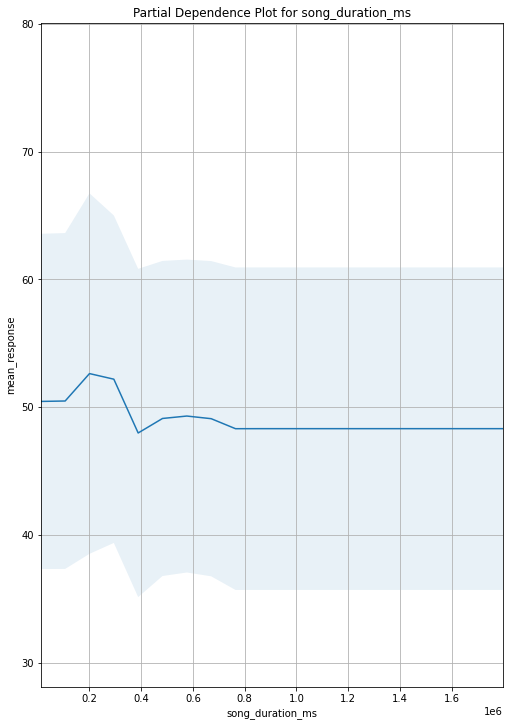

In [144]:
best_model.partial_plot(df, cols=['song_duration_ms'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%

PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'acousticness'.


/usr/local/lib/python3.7/dist-packages/h2o/model/model_base.py:1321: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


,acousticness,mean_response,stddev_response,std_error_mean_response
0,0.000001,49.028312,11.413016,0.083165
1,0.052422,52.223936,12.913141,0.094096
2,0.104843,52.505245,12.888654,0.093918
3,0.157264,53.086863,12.506637,0.091134
4,0.209685,53.213011,12.260443,0.089340
5,0.262106,53.279189,12.320030,0.089774
6,0.314527,51.760031,12.064655,0.087913
7,0.366948,51.841011,11.957216,0.087131
8,0.419369,50.876651,10.202328,0.074343
9,0.471790,50.404945,10.224198,0.074502



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'danceability'.


,danceability,mean_response,stddev_response,std_error_mean_response
0,0.000000,46.272889,10.169270,0.074102
1,0.051947,46.272889,10.169270,0.074102
2,0.103895,46.291805,10.160117,0.074035
3,0.155842,46.292360,10.159389,0.074030
4,0.207789,46.737909,10.166385,0.074081
5,0.259737,47.332417,10.078365,0.073440
6,0.311684,47.488134,9.979102,0.072716
7,0.363632,49.088163,10.656334,0.077651
8,0.415579,49.190778,10.646297,0.077578
9,0.467526,49.179260,10.690762,0.077902



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'energy'.


,energy,mean_response,stddev_response,std_error_mean_response
0,0.001070,52.477657,12.596276,0.091787
1,0.053593,52.034787,12.941391,0.094302
2,0.106115,51.902846,13.217419,0.096313
3,0.158638,52.061953,13.370828,0.097431
4,0.211161,52.390712,13.254319,0.096582
5,0.263683,52.250055,13.395429,0.097611
6,0.316206,52.267913,13.418728,0.097780
7,0.368728,52.294193,13.447123,0.097987
8,0.421251,52.744116,13.504247,0.098404
9,0.473774,53.058941,13.527357,0.098572



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'instrumentalness'.


,instrumentalness,mean_response,stddev_response,std_error_mean_response
0,0.000000,53.766183,14.489675,0.105584
1,0.052474,47.492285,8.917340,0.064979
2,0.104947,46.187243,9.014297,0.065686
3,0.157421,45.969917,8.795173,0.064089
4,0.209895,45.703740,8.804441,0.064157
5,0.262368,45.949655,8.729427,0.063610
6,0.314842,45.642559,8.878108,0.064694
7,0.367316,45.979984,8.948516,0.065207
8,0.419789,44.033812,8.670922,0.063184
9,0.472263,43.320764,8.580719,0.062526



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'key'.


,key,mean_response,stddev_response,std_error_mean_response
0,0.0,52.734901,13.733605,0.100075
1,1.0,52.831255,13.685172,0.099722
2,2.0,52.575968,13.914336,0.101392
3,3.0,52.463069,14.041690,0.102320
4,4.0,52.447479,14.052868,0.102401
5,5.0,52.326626,14.076835,0.102576
6,6.0,52.430399,14.135669,0.103005
7,7.0,52.091710,14.015337,0.102128
8,8.0,52.138218,13.818149,0.100691
9,9.0,52.269434,13.675001,0.099648



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'liveness'.


,liveness,mean_response,stddev_response,std_error_mean_response
0,0.010900,52.414422,13.506718,0.098422
1,0.062221,52.966616,13.568003,0.098868
2,0.113542,52.733220,13.906978,0.101338
3,0.164863,52.518057,13.946671,0.101627
4,0.216184,51.787005,13.621442,0.099258
5,0.267505,51.562419,13.480992,0.098234
6,0.318826,51.266448,13.437024,0.097914
7,0.370147,51.403443,13.303012,0.096937
8,0.421468,50.965417,12.819983,0.093417
9,0.472789,50.613055,12.819676,0.093415



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'loudness'.


,loudness,mean_response,stddev_response,std_error_mean_response
0,-38.768000,47.944691,9.991157,0.072804
1,-36.644158,47.944691,9.991157,0.072804
2,-34.520316,47.952695,9.998077,0.072855
3,-32.396474,47.953850,9.999645,0.072866
4,-30.272632,47.958304,10.001164,0.072877
5,-28.148789,47.963560,10.007648,0.072924
6,-26.024947,48.112513,9.987060,0.072774
7,-23.901105,48.192516,9.958416,0.072566
8,-21.777263,48.169021,9.950261,0.072506
9,-19.653421,47.703979,10.001887,0.072882



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'audio_mode'.


,audio_mode,mean_response,stddev_response,std_error_mean_response
0,0.0,52.639399,15.419850,0.112362
1,1.0,53.191251,15.516096,0.113064



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'speechiness'.


,speechiness,mean_response,stddev_response,std_error_mean_response
0,0.000000,52.399026,14.055815,0.102423
1,0.049526,52.962134,14.316865,0.104325
2,0.099053,52.752258,14.249246,0.103832
3,0.148579,52.367395,14.148415,0.103097
4,0.198105,52.416405,14.094778,0.102707
5,0.247632,51.764752,13.955566,0.101692
6,0.297158,51.569553,13.814022,0.100661
7,0.346684,50.646542,13.111878,0.095544
8,0.396211,50.136784,13.211290,0.096269
9,0.445737,49.922624,13.179245,0.096035



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'tempo'.


,tempo,mean_response,stddev_response,std_error_mean_response
0,0.000000,51.655888,12.312297,0.089718
1,12.753579,51.655888,12.312297,0.089718
2,25.507158,51.655888,12.312297,0.089718
3,38.260737,51.655888,12.312297,0.089718
4,51.014316,51.656154,12.312203,0.089717
5,63.767895,51.340767,12.375654,0.090180
6,76.521474,51.823668,12.556190,0.091495
7,89.275053,51.988660,12.568044,0.091582
8,102.028632,52.549141,13.494441,0.098332
9,114.782211,52.377511,13.434605,0.097896



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'time_signature'.


,time_signature,mean_response,stddev_response,std_error_mean_response
0,0.0,50.623704,14.396763,0.104907
1,1.0,50.623704,14.396763,0.104907
2,2.0,50.900432,14.095507,0.102712
3,3.0,50.948542,14.113215,0.102841
4,4.0,53.206972,15.895865,0.115831
5,5.0,53.306318,15.674352,0.114217



PartialDependence: Partial Dependence Plot of model DRF_1_AutoML_1_20220214_42243 on column 'audio_valence'.


,audio_valence,mean_response,stddev_response,std_error_mean_response
0,0.000000,53.007679,11.601109,0.084536
1,0.051789,53.022168,11.601159,0.084536
2,0.103579,52.497013,11.572605,0.084328
3,0.155368,53.148000,11.945848,0.087048
4,0.207158,52.970421,12.133913,0.088418
5,0.258947,53.016978,12.548106,0.091436
6,0.310737,53.047161,12.529381,0.091300
7,0.362526,52.776386,12.444709,0.090683
8,0.414316,52.857078,12.251375,0.089274
9,0.466105,52.955358,12.279741,0.089481


[, , , , , , , , , , , ]

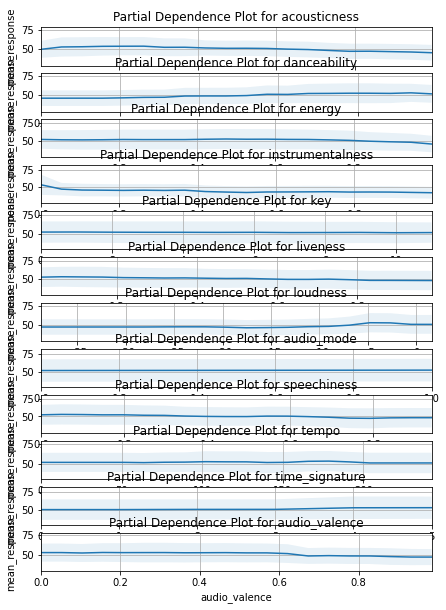

In [145]:
 best_model.partial_plot(df, cols=['acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence'])

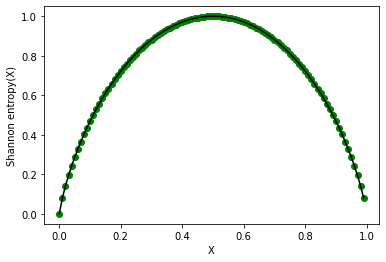

In [146]:
def shannon_entropy(p):   
    return (-p *np.log2(p) - (1-p)*np.log2(1-p))
base=0.0000000001
x = np.arange(base, 1.0-base, 0.01)
plt.figure(1)
plt.plot(x, shannon_entropy(x), 'go', x, shannon_entropy(x), 'k')
plt.ylabel('Shannon entropy(X)')
plt.xlabel('X')
plt.show()

###1) Is the relationship significant?


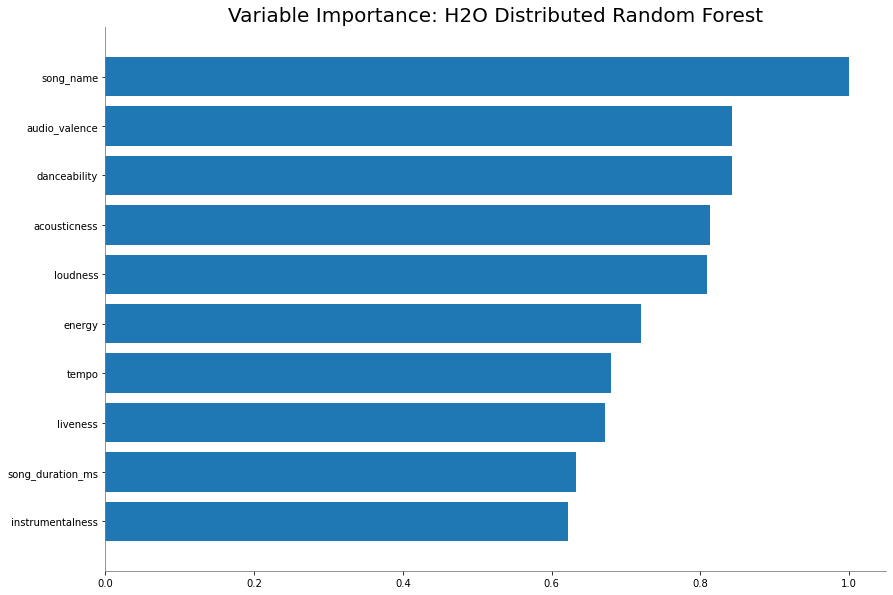

<Figure size 432x288 with 0 Axes>

In [147]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

### Are any model assumptions violated?



There are four assumptions associated with a linear regression model:

1.   Linearity: The relationship between X and the mean of Y is linear.
2.   Homoscedasticity: The variance of residual is the same for any value of X
3.   Independence: Observations are independent of each other.
4.   Normality: For any fixed value of X, Y is normally distributed.



Data is linear because MSE value is too high. The data is linear and this is satisfied linearity assumption.
Ref : https://github.com/h2oai/h2o-tutorials/issues/50

In [148]:
best_model.model_performance()


ModelMetricsRegression: drf
** Reported on train data. **

MSE: 423.26947153747045
RMSE: 20.573513835450434
MAE: 14.88823068696378
RMSLE: 0.7910203069551026
Mean Residual Deviance: 423.26947153747045


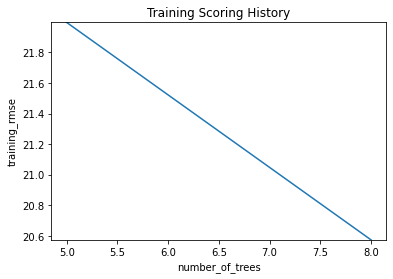

In [149]:
best_model.plot()

In [150]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import os
import seaborn as sns
df_dp=pd.read_csv("/content/drive/MyDrive/song_data.csv")

def diagnostic_plots(df, variable):
    
    plt.figure(figsize=(20, 9))

    plt.subplot(1, 3, 1)
    sns.histplot(data = df_dp, x=variable, bins=30, kde=True)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')
    
    plt.show()

In [151]:
num_columns=df_dp[['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence']].columns
num_columns

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode',
       'speechiness', 'tempo', 'time_signature', 'audio_valence'],
      dtype='object')

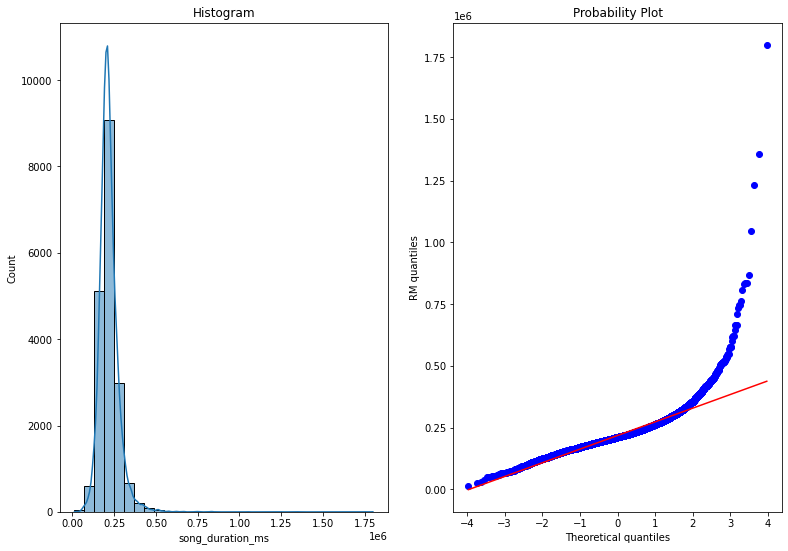

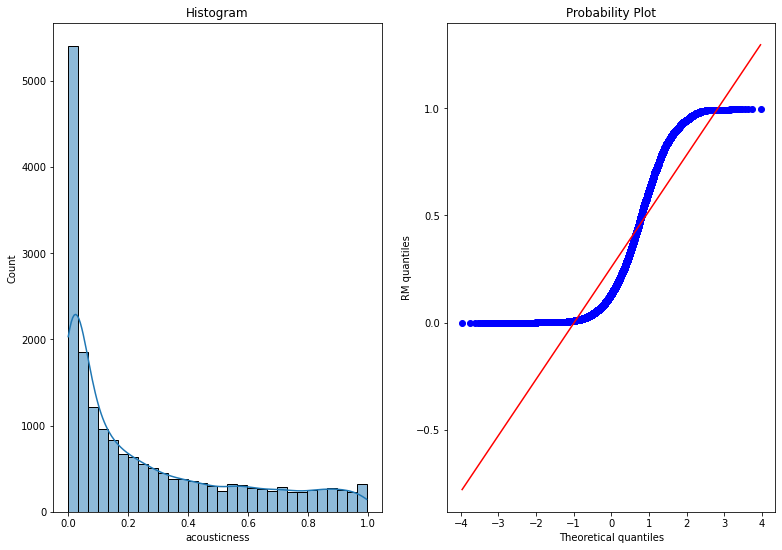

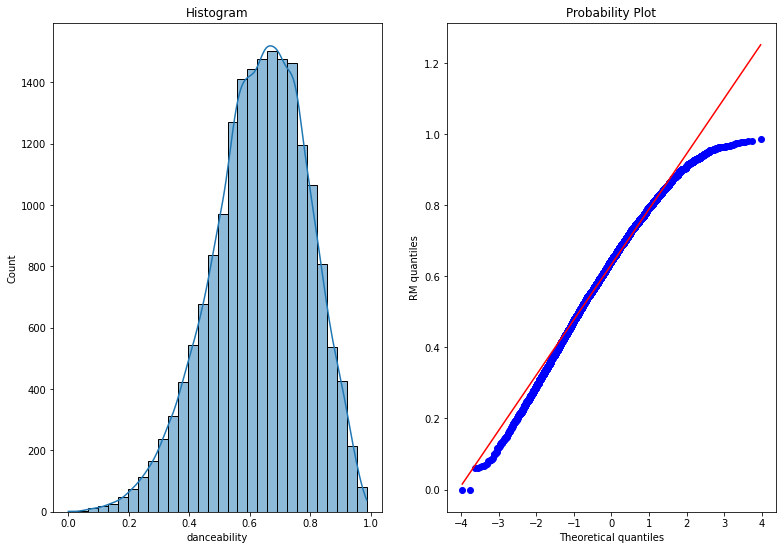

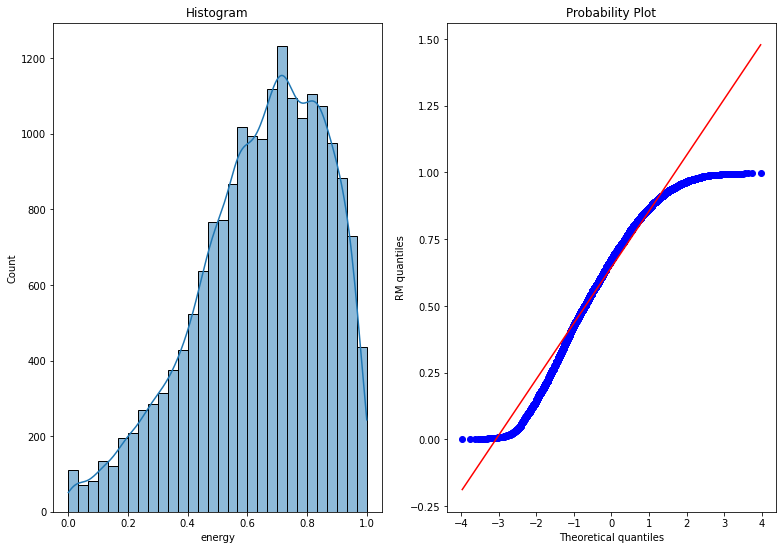

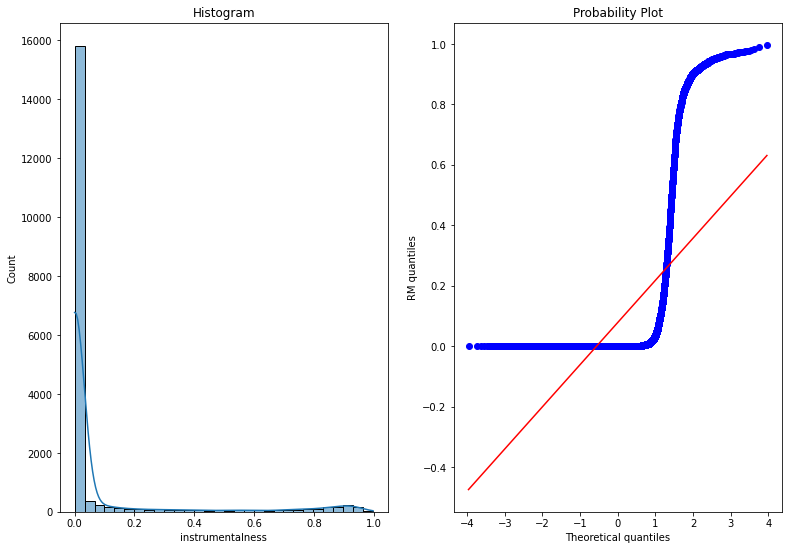

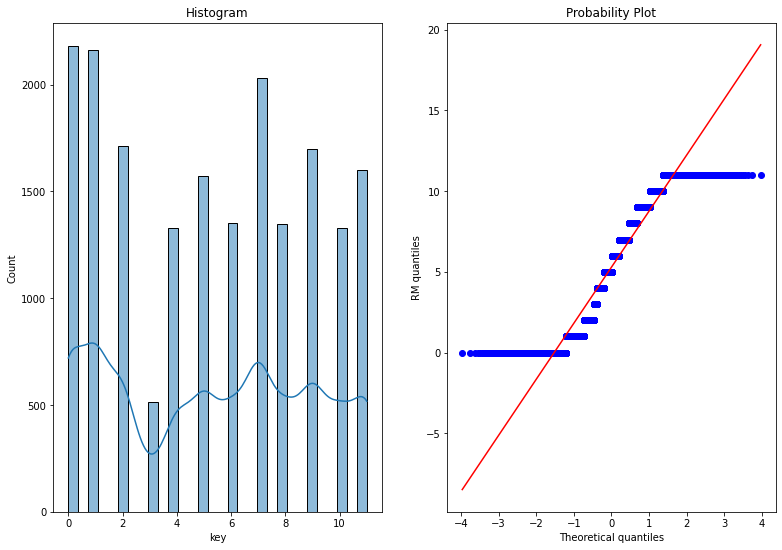

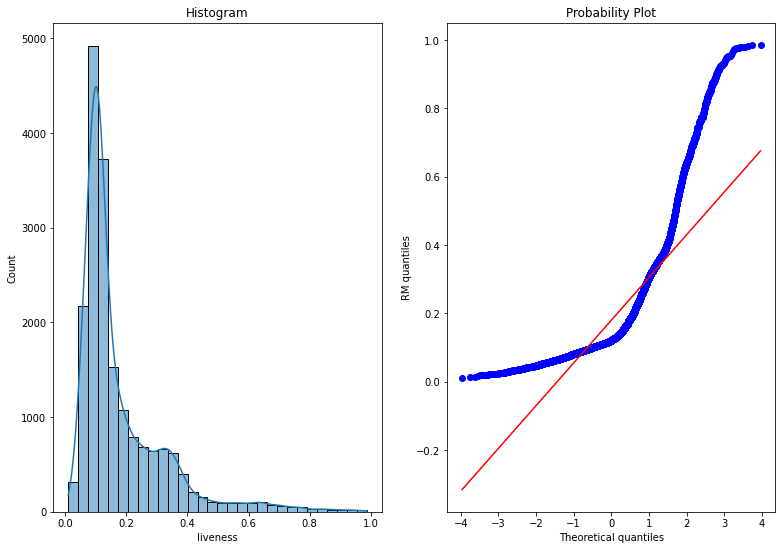

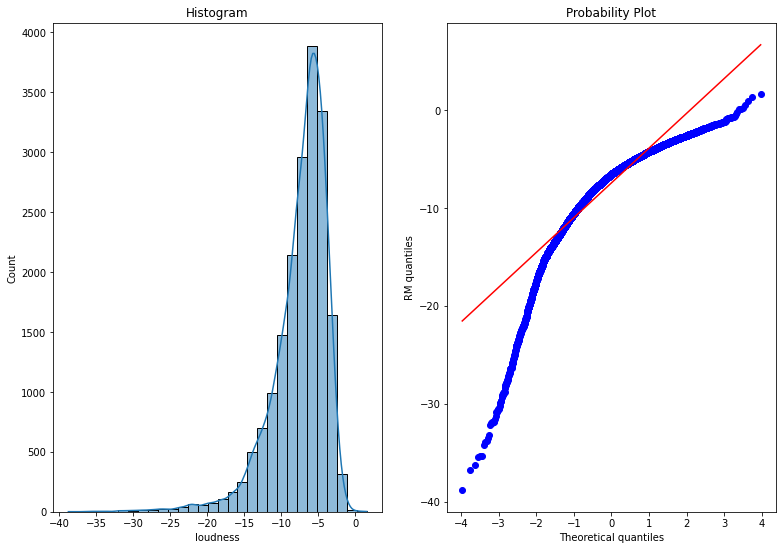

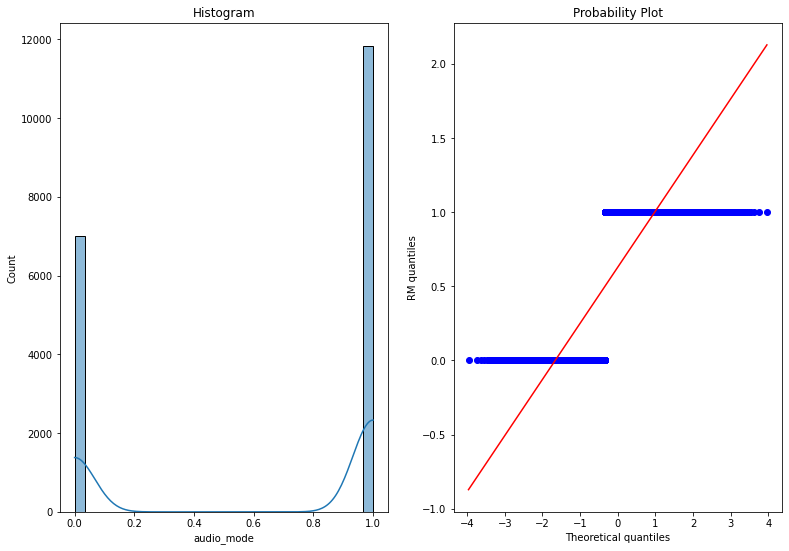

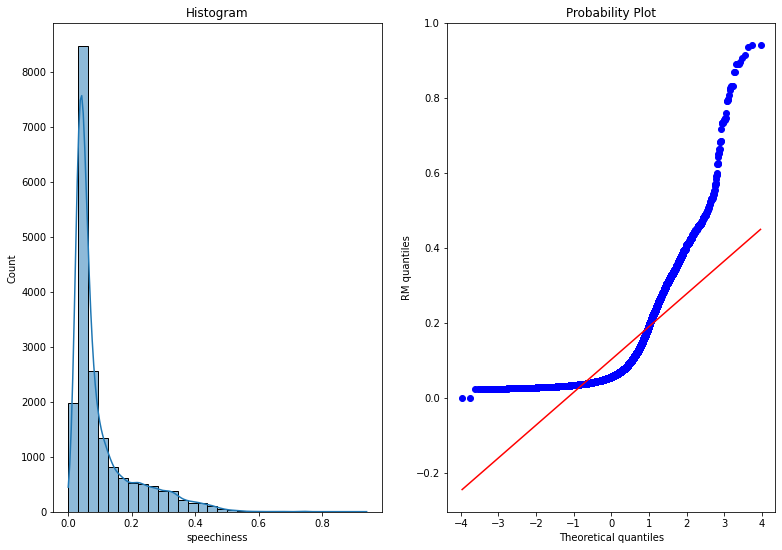

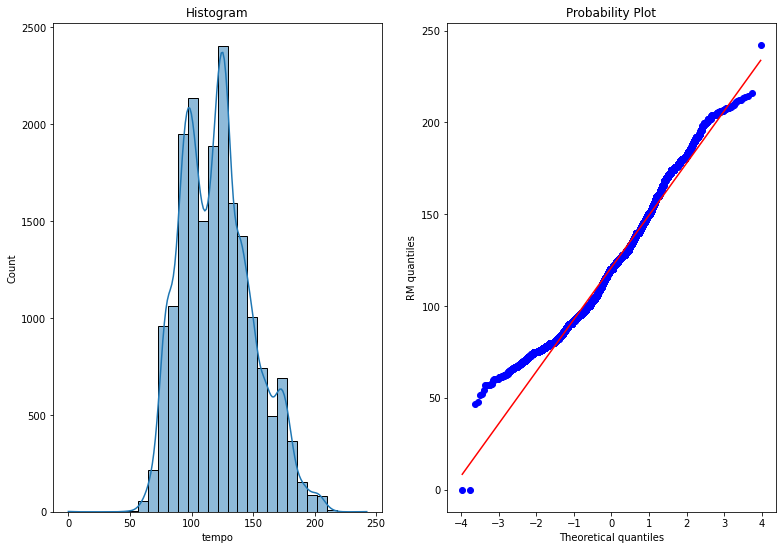

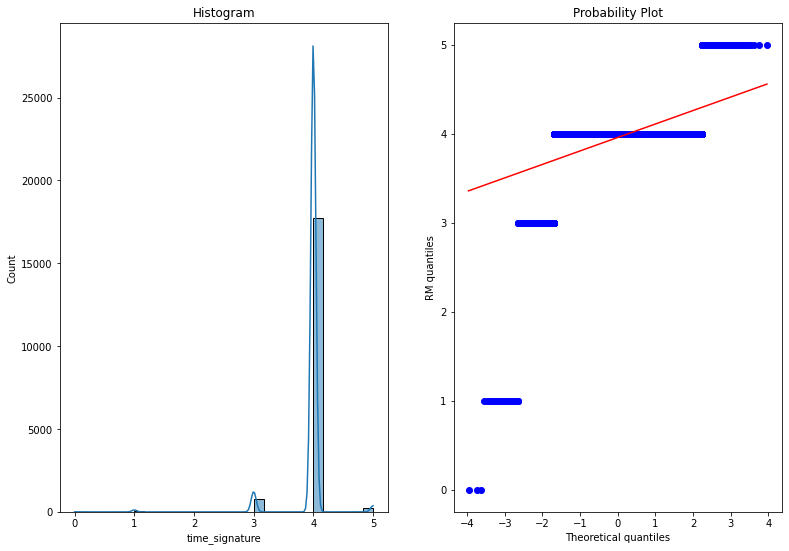

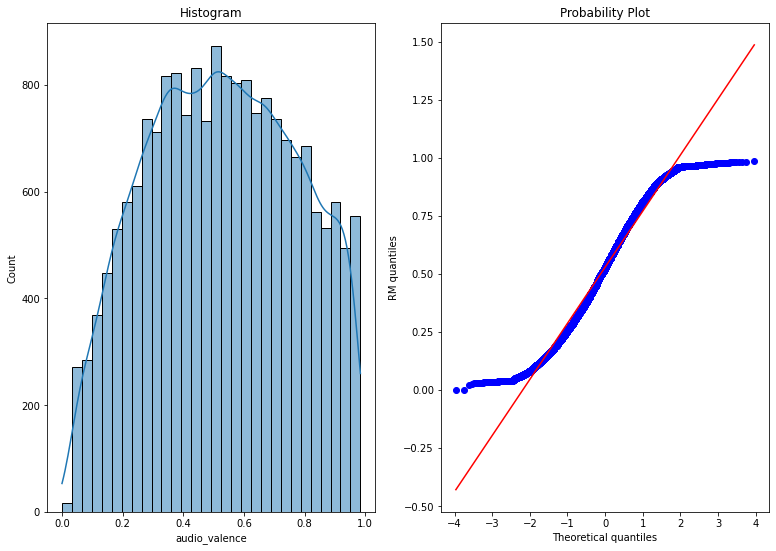

In [152]:
for i in num_columns:
    diagnostic_plots(df_dp,i)

Normalization : Data is not normally distributed hence one of the model assumption is violated.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


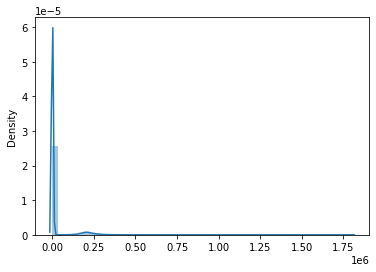

In [153]:
import seaborn as sns
df_norm=pd.read_csv("/content/drive/MyDrive/song_data.csv")
df_norm=df_norm.iloc[:,1:-1]
ax=sns.distplot(df_norm)

### Is there any multi collinearity in the model?

As per the [Analytics Vidya](https://www.analyticsvidhya.com/blog/2020/03/what-is-multicollinearity/) multi collinearity is something which occurs when more than two independent variables are highly correlated to each other. 

**Why is it an issue?**<br>
Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable. It will might **not effect effieciency** of the model but might effect the reiabibility of the model

**How to fix?**<br>
Highest multi collinear columns must be dropped to fix the multi collinearity issue

In [154]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [155]:
# VIF dataframe
dfp=pd.read_csv("/content/drive/MyDrive/song_data.csv")

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)


In [156]:
X = dfp.iloc[:,2:-1]
calc_vif(X)

,variables,VIF
0,song_duration_ms,14.103976
1,acousticness,3.094855
2,danceability,18.726144
3,energy,26.608692
4,instrumentalness,1.367619
5,key,3.208829
6,liveness,2.680655
7,loudness,11.682548
8,audio_mode,2.805244
9,speechiness,2.134654


In [157]:
preds = aml.predict(df_test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [158]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
# Get the "All Models" Stacked Ensemble model
se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
metalearner = h2o.get_model(se.metalearner()['name'])


/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


In [159]:
metalearner.coef_norm()

{'DRF_1_AutoML_1_20220214_42243': 6.714339787031053,
 'GBM_1_AutoML_1_20220214_42243': 1.6091055960132215,
 'GBM_2_AutoML_1_20220214_42243': 0.0,
 'GBM_3_AutoML_1_20220214_42243': 0.8291806123897282,
 'GBM_4_AutoML_1_20220214_42243': 3.5890706279948383,
 'GLM_1_AutoML_1_20220214_42243': 0.0,
 'Intercept': 52.79221208515149,
 'XGBoost_1_AutoML_1_20220214_42243': 0.5350016894435257,
 'XGBoost_2_AutoML_1_20220214_42243': 0.0}

### In the multivariate models are predictor variables independent of all the other predictor variables?



You can tell if two random variables are independent by looking at their individual probabilities. If those probabilities don’t change when the events meet, then those variables are independent. Another way of saying this is that if the two variables are correlated, then they are not independent.[[Ref]](https://www.statisticshowto.com/independent-random-variables/#:~:text=You%20can%20tell%20if%20two,then%20they%20are%20not%20independent). So yes the variables are NOT independent in multivariate models. 

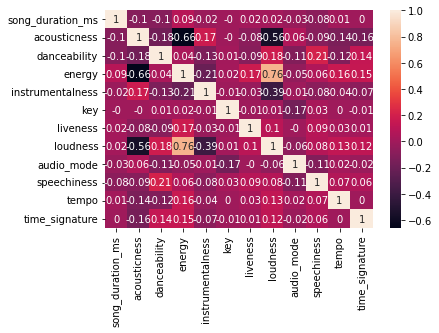

In [160]:
df_n=pd.read_csv("/content/drive/MyDrive/song_data.csv")
df_n=df_n.iloc[:,2:-1]
cor_h2o=df_n.corr(method='pearson',min_periods=1).round(2)
sns.heatmap(cor_h2o, annot=True)
plt.show()

### In multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.



Multiple Variable models have more than one variable which can act as predictor, as per [Elseiver](https://www.elsevier.es/en-revista-allergologia-et-immunopathologia-105-articulo-simple-linear-multivariate-regression-models-S0301054611001054). 

In [161]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

model_glm=H2OGeneralizedLinearEstimator(family = 'poisson', lambda_ = 0,
                                             remove_collinear_columns = True,
                                             compute_p_values = True)



In [162]:
predictors=['song_duration_ms','acousticness','danceability','energy','instrumentalness','key','liveness','loudness','audio_mode','speechiness','tempo','time_signature','audio_valence']

In [163]:
response='song_popularity'

In [164]:
model_glm.train(x = predictors, y = response, training_frame = df_train, validation_frame = df_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644812547287_1


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,poisson,log,None,13,13,3,py_47_sid_b9f8




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 460.5107138093646
RMSE: 21.459513363759314
MAE: 17.104868170955402
RMSLE: 0.7931194880131387
R^2: 0.04968581587869658
Mean Residual Deviance: 11.033092025783732
Null degrees of freedom: 15125
Residual degrees of freedom: 15112
Null deviance: 173572.03634961994
Residual deviance: 166886.54998200474
AIC: 251548.14030791403

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 439.10303403905766
RMSE: 20.954785468695633
MAE: 16.764480917696957
RMSLE: 0.7508044835799164
R^2: 0.04365748593357699
Mean Residual Deviance: 10.313811133195214
Null degrees of freedom: 3706
Residual degrees of freedom: 3693
Null deviance: 39642.68929500554
Residual deviance: 38233.29787075466
AIC: 59146.66384376317

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2,validation_rmse,validation_deviance,validation_mae,validation_r2
0,,2022-02-14 04:27:15,0.000 sec,0,173572.036350,11.475078,,,,,,,,
1,,2022-02-14 04:27:15,0.039 sec,1,166924.508117,11.035601,,,,,,,,
2,,2022-02-14 04:27:15,0.059 sec,2,166886.554269,11.033092,,,,,,,,
3,,2022-02-14 04:27:15,0.074 sec,3,166886.549982,11.033092,21.459513,11.033092,17.104868,0.049686,20.954785,10.313811,16.764481,0.043657



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,loudness,0.051865,1.000000,0.173166
1,energy,0.048136,0.928099,0.160715
2,instrumentalness,0.047753,0.920706,0.159435
3,audio_valence,0.040779,0.786250,0.136152
4,danceability,0.038590,0.744042,0.128843
5,acousticness,0.025029,0.482584,0.083567
6,liveness,0.013100,0.252568,0.043736
7,time_signature,0.010222,0.197094,0.034130
8,song_duration_ms,0.005734,0.110561,0.019145
9,audio_mode,0.005666,0.109246,0.018918


In [165]:
varimp = model_glm.varimp(use_pandas=True)

In [166]:
print(varimp)

            variable  relative_importance  scaled_importance  percentage
0           loudness             0.051865           1.000000    0.173166
1             energy             0.048136           0.928099    0.160715
2   instrumentalness             0.047753           0.920706    0.159435
3      audio_valence             0.040779           0.786250    0.136152
4       danceability             0.038590           0.744042    0.128843
5       acousticness             0.025029           0.482584    0.083567
6           liveness             0.013100           0.252568    0.043736
7     time_signature             0.010222           0.197094    0.034130
8   song_duration_ms             0.005734           0.110561    0.019145
9         audio_mode             0.005666           0.109246    0.018918
10             tempo             0.005588           0.107733    0.018656
11               key             0.003533           0.068124    0.011797
12       speechiness             0.003516          

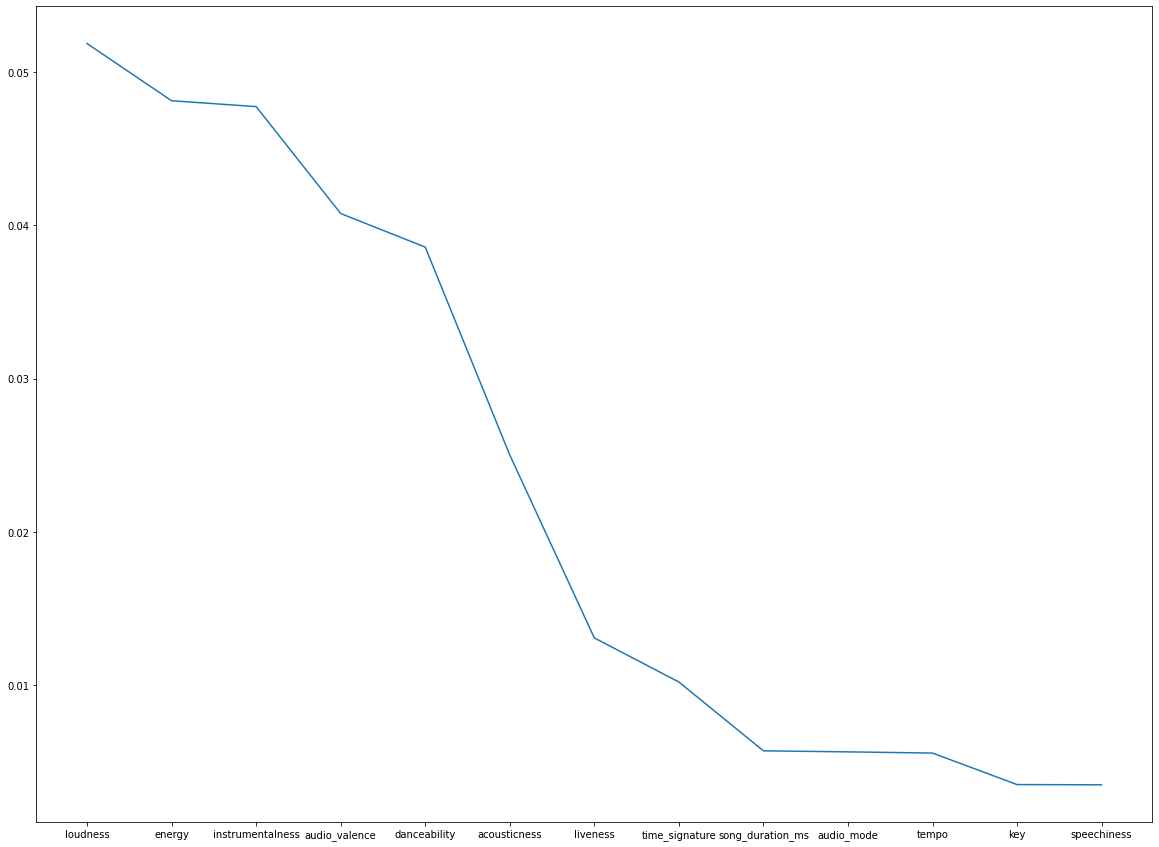

In [167]:
plt.figure(figsize=(20,15))

plt.plot(varimp['variable'],varimp['relative_importance'])


### Does the model make sense?



As per the model summary R^2 value is 0.7 for the model which is referred as high accuracy of the model with the help of H2o Auto ML

###Does regularization help?



Yes regularization helps alot MSE value before regularization was 110 and after it was 455 hence regularization is making sense to model

In [168]:
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
charges_glm = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = 0, compute_p_values = True)
charges_glm_regularization = H2OGeneralizedLinearEstimator(family = 'gaussian', lambda_ = .001, alpha = 0)

In [189]:
df_r= df.drop(['song_name'], axis = 1)
X=df_r.columns


In [190]:
pct_rows=0.80
df1_train,df1_test = df.split_frame([pct_rows])

In [191]:
charges_glm_regularization.train(x = X, y= y,training_frame = df_r)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1644812547287_2


GLM Model: summary


,,family,link,regularization,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.001 ),14,14,1,py_81_sid_b9f8




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0005019118648874319
RMSE: 0.022403389584780067
MAE: 0.01784557889429429
RMSLE: 0.007061735619983261
R^2: 0.9999989538035213
Mean Residual Deviance: 0.0005019118648874319
Null degrees of freedom: 18832
Residual degrees of freedom: 18818
Null deviance: 9035115.625338487
Residual deviance: 9.452506151425005
AIC: -89598.18225385374

Scoring History: 


,,timestamp,duration,iterations,negative_log_likelihood,objective,training_rmse,training_deviance,training_mae,training_r2
0,,2022-02-14 04:30:11,0.000 sec,0,9035115.625338,479.749144,,,,
1,,2022-02-14 04:30:11,0.045 sec,1,,,0.022403,0.000502,0.017846,0.999999



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,churn_bit,21.880817,1.000000,0.999281
1,loudness,0.002812,0.000128,0.000128
2,energy,0.002616,0.000120,0.000119
3,instrumentalness,0.002385,0.000109,0.000109
4,audio_valence,0.002243,0.000102,0.000102
5,danceability,0.002087,0.000095,0.000095
6,acousticness,0.001231,0.000056,0.000056
7,liveness,0.000676,0.000031,0.000031
8,time_signature,0.000444,0.000020,0.000020
9,tempo,0.000341,0.000016,0.000016


### Which independent variables are significant? 


In [174]:
df_n=pd.read_csv("/content/drive/MyDrive/song_data.csv")

df_n=df_n.iloc[:,2:-1]
cor_h2o=df_n.corr(method='pearson',min_periods=1).round(2)

In [175]:
import seaborn as sns

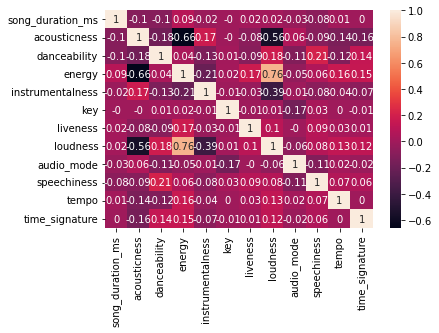

In [176]:
sns.heatmap(cor_h2o, annot=True)
plt.show()

Filtered values more than 0.7 to find most relevant values from the below heatmap it shows energy and loudness are most correlated variables in the dataset. If we filter it less than 0.6 it will show relation between acousticness and energy

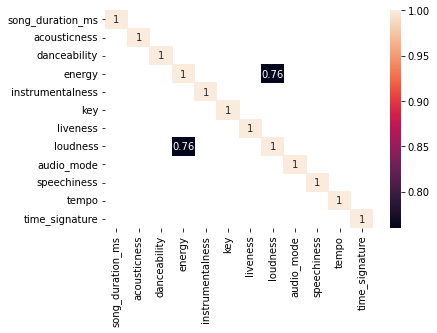

In [178]:
cor_h2o = cor_h2o.unstack()
cor_h2o = cor_h2o[abs(cor_h2o) >= 0.7]
cor_h2o.describe()
sns.heatmap(cor_h2o, annot=True)
plt.show()

###Which hyperparameters are important?

Hyperparameters like gamma,max depth, split datasets will be hyperparameters which are important. 




### *Conclusion*
Completed the notebook here with the end notes as the auto ml library H2O.ai is working perfectly with the dataset and with effieicnt accuracy of the model. The notebook concludes that there are h2o library can help giving better accuracy with less amount of work. But still I believe the dataset is supposed to manipulated and made neccessary functions which library limits. The dateset was small but can be more accurate with more data. H2o library gave the results with accuracy of 77%. Notebook has considered with and without regularization effects to the model. Also which variables are important and directly dependent to each other.

## Licensing and Citation H2o.ai
H2O.ai (Feb 2022). Auto ML  for H2O, Python module version 3.10.0.8. <br>
Copyright (c) 2022 Author Saad Ghojaria.

